Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 148, 148,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 148, 148,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 146, 146,  │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 146, 146,  │     18,464 │ conv2d_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 144, 144,  │      9,248 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 144, 144,  │      9,248 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,896 (191.00 KB)

 Trainable params: 48,896 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

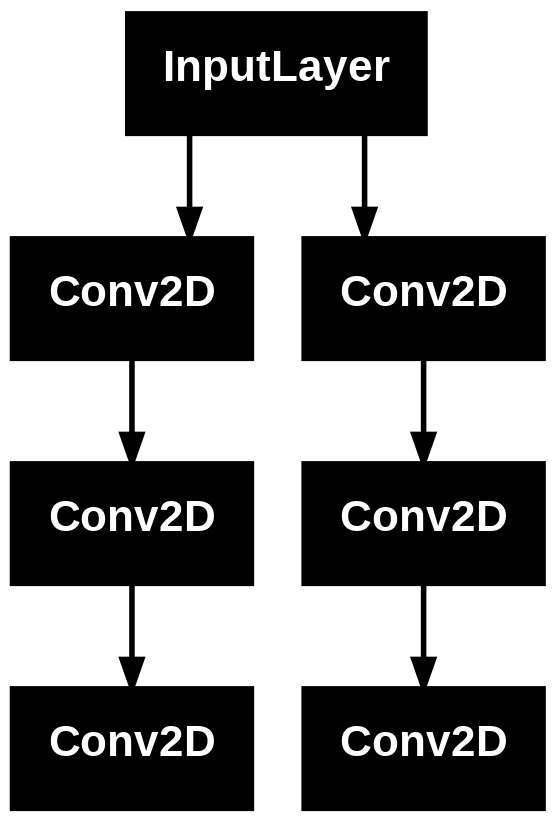

In [ ]:
from keras import models
from keras import layers
from keras.utils import plot_model

inp = layers.Input(shape=(150,150,3))

# Branch 1
x = layers.Conv2D(32, (3,3))(inp)
x = layers.Conv2D(32, (3,3))(x)
out_1 = layers.Conv2D(32, (3,3))(x)

# Branch 2
x1 = layers.Conv2D(64, (3,3))(inp)
x1 = layers.Conv2D(32, (3,3))(x1)
out_2 = layers.Conv2D(32, (3,3))(x1)

#option one
#merged = layers.Concatenate([out_1, out_2])
#model = models.Model(inputs=inp, outputs=merged)

# option two
model = models.Model(inputs=inp, outputs=[out_1, out_2])


model.summary()
plot_model(model)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │        600 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 200)       │      1,200 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     10,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 200)       │     40,200 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │     10,100 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 200)       │     40,200 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,400 (400.00 KB)

 Trainable params: 102,400 (400.00 KB)

 Non-trainable params: 0 (0.00 B)

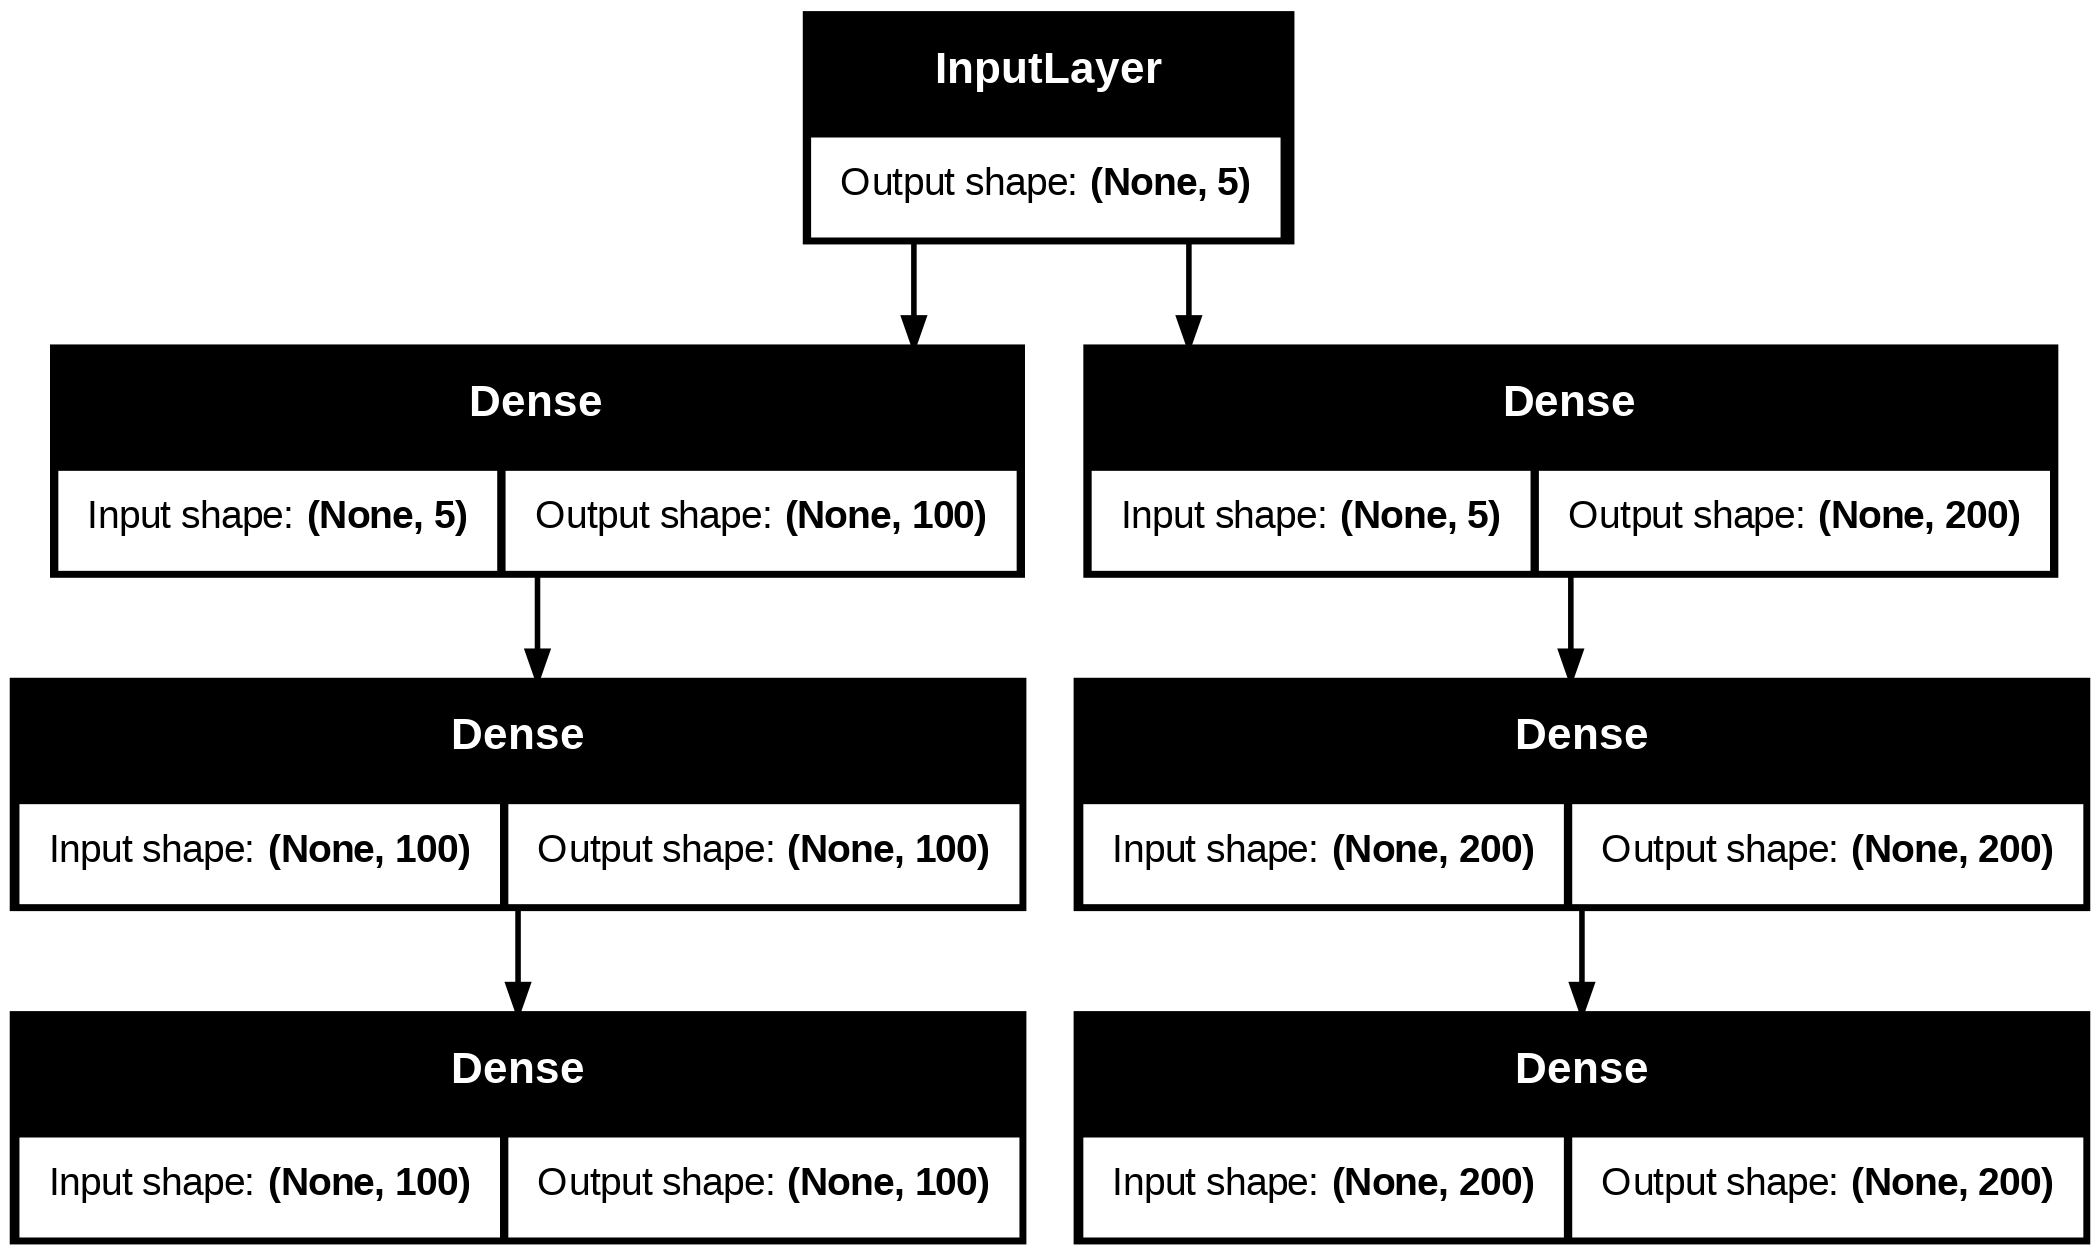

In [ ]:
from keras import models
from keras import layers
from keras.utils import plot_model

inp = layers.Input(shape=(5,))

# Branch 1
x = layers.Dense(100)(inp)
x = layers.Dense(100)(x)
out_1 = layers.Dense(100)(x)

# Branch 2
x1 = layers.Dense(200)(inp)
x1 = layers.Dense(200)(x1)
out_2 = layers.Dense(200)(x1)

#merged = layers.Concatenate([out_1, out_2])

# func
model = models.Model(inputs=inp, outputs=[out_1, out_2])

model.summary()
plot_model(model, show_shapes=True)


Concatenate wont work. You need small concatenate for functional model

https://datascience.stackexchange.com/questions/55050/what-is-the-difference-between-concatenate-and-concatenate-layers-in-keras

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ material (Dense)    │ (None, 100)       │        600 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 50)        │        300 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 100)       │     10,100 │ material[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 50)        │      2,550 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 100)       │     10,100 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 50)        │      2,550 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 150)       │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,200 (102.34 KB)

 Trainable params: 26,200 (102.34 KB)

 Non-trainable params: 0 (0.00 B)

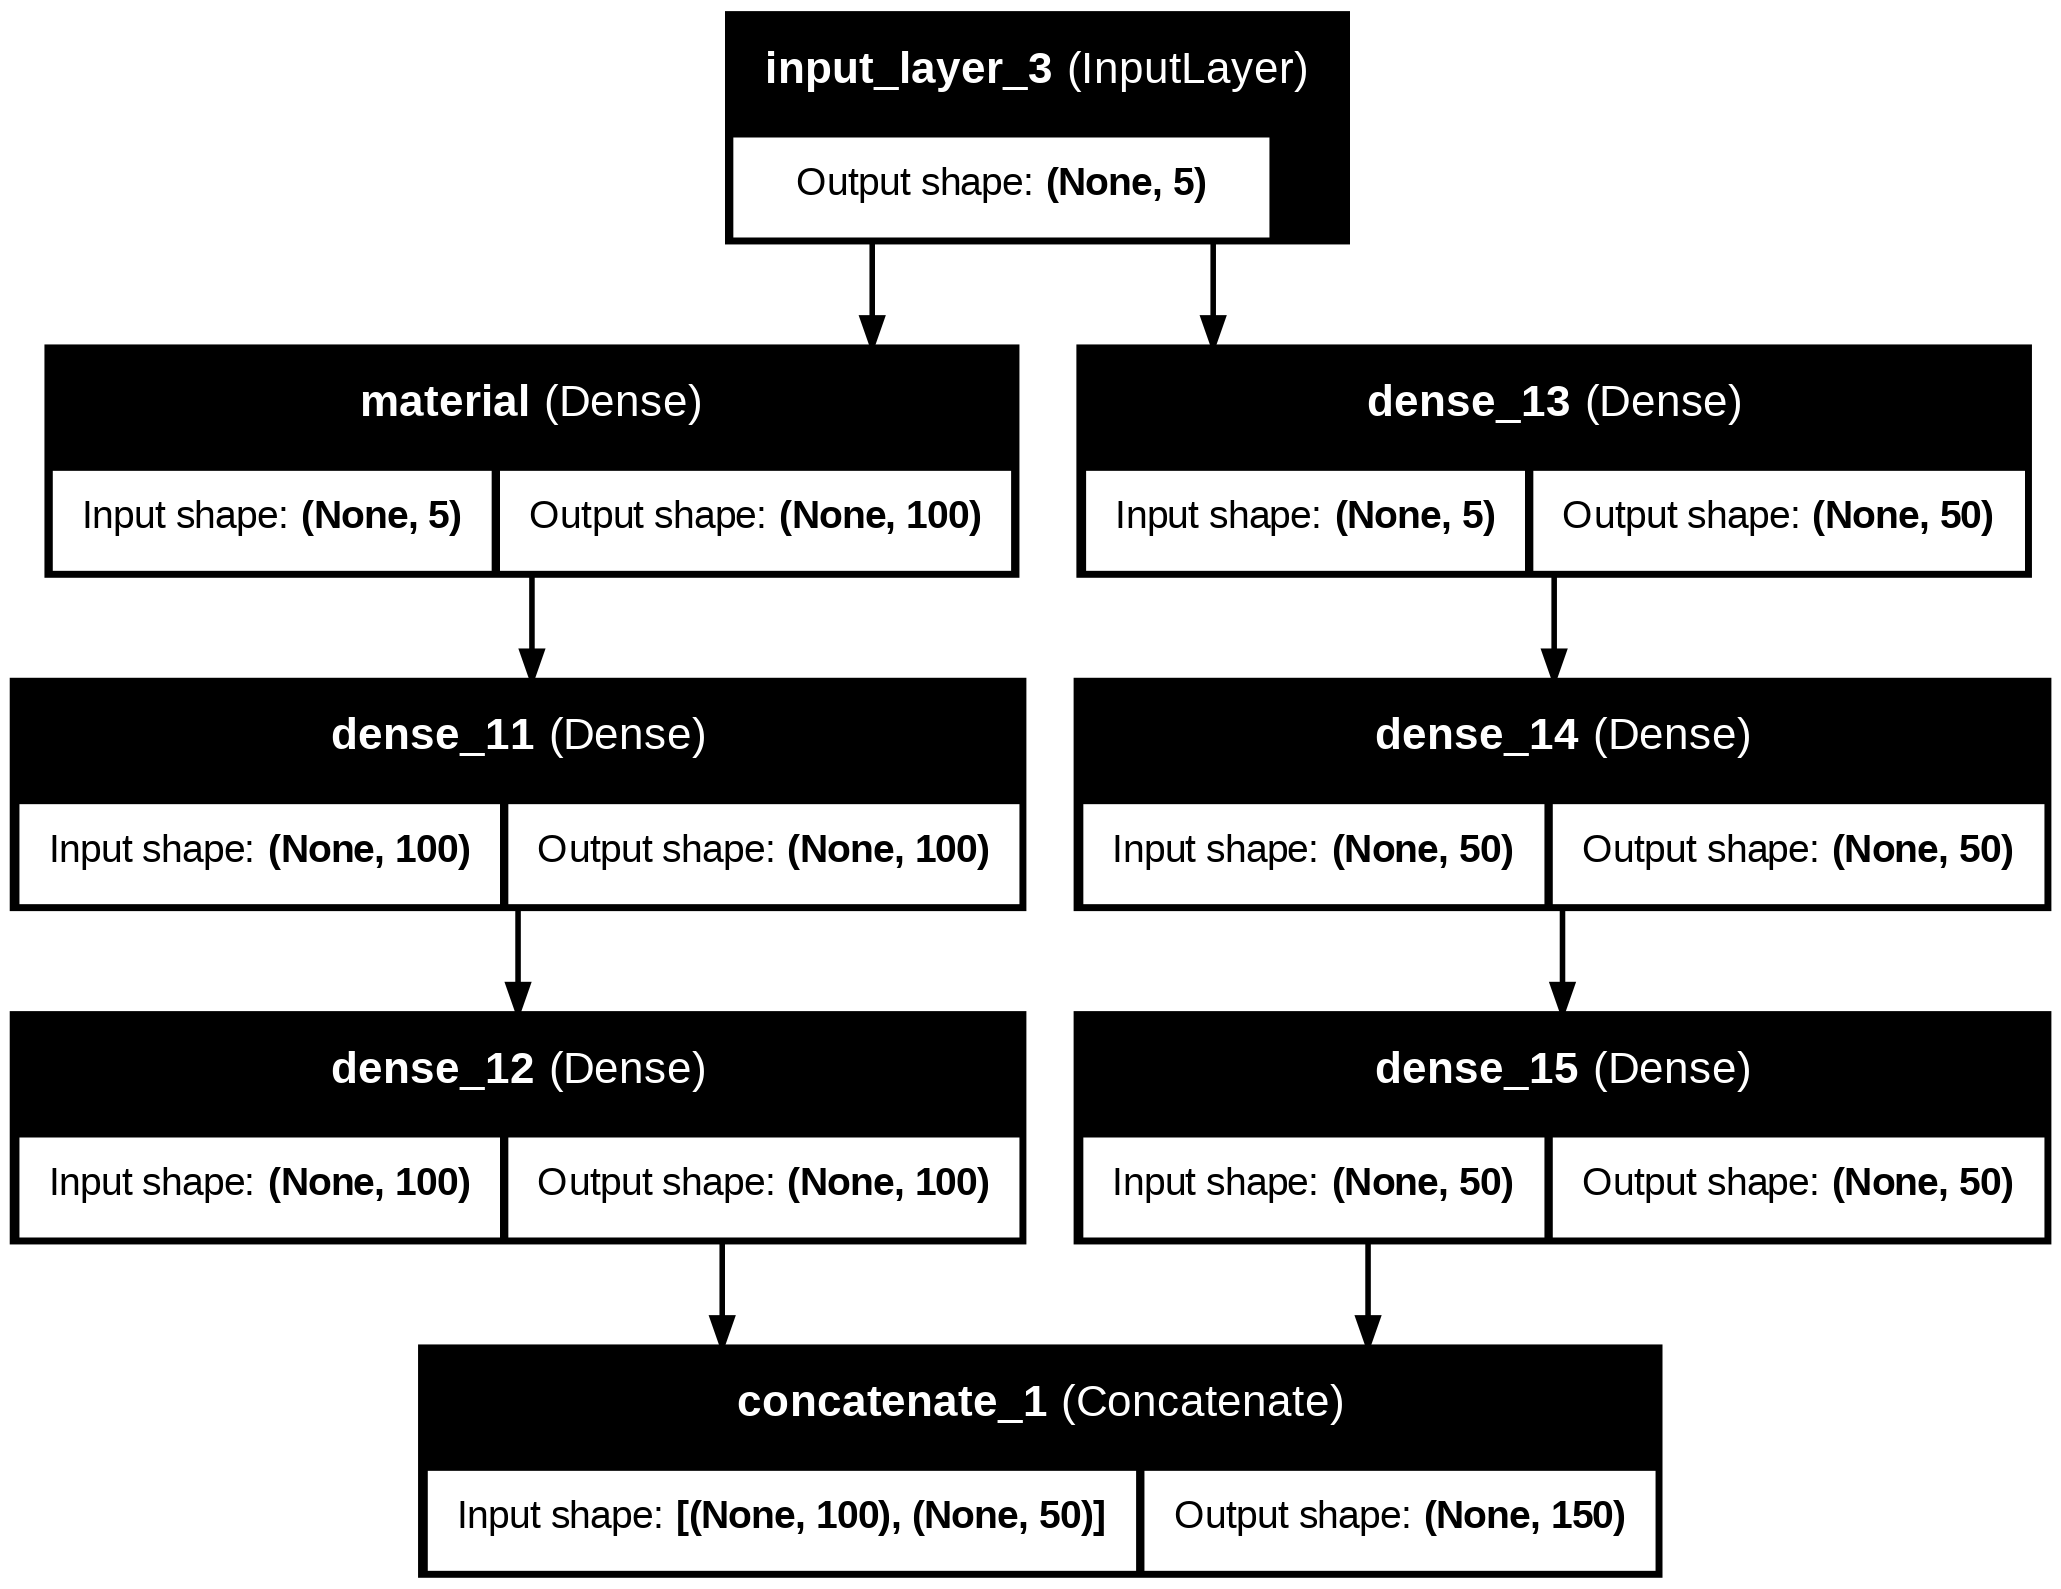

In [ ]:
from keras import models
from keras import layers
from keras.utils import plot_model

inp = layers.Input(shape=(5,))

# Branch 1
x = layers.Dense(100, name='material')(inp)
x = layers.Dense(100)(x)
out_1 = layers.Dense(100)(x)

# Branch 2
x1 = layers.Dense(50)(inp)
x1 = layers.Dense(50)(x1)
out_2 = layers.Dense(50)(x1)

merged = layers.concatenate([out_1, out_2])

# func
model = models.Model(inputs=inp, outputs=merged)

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 148, 148,  │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 148, 148,  │      1,792 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 146, 146,  │      9,248 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 146, 146,  │     18,464 │ conv2d_9[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 144, 144,  │      9,248 │ conv2d_7[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 144, 144,  │      9,248 │ conv2d_10[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 144, 144,  │          0 │ conv2d_8[0][0],   │
│ (Concatenate)       │ 64)               │            │ conv2d_11[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,896 (191.00 KB)

 Trainable params: 48,896 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

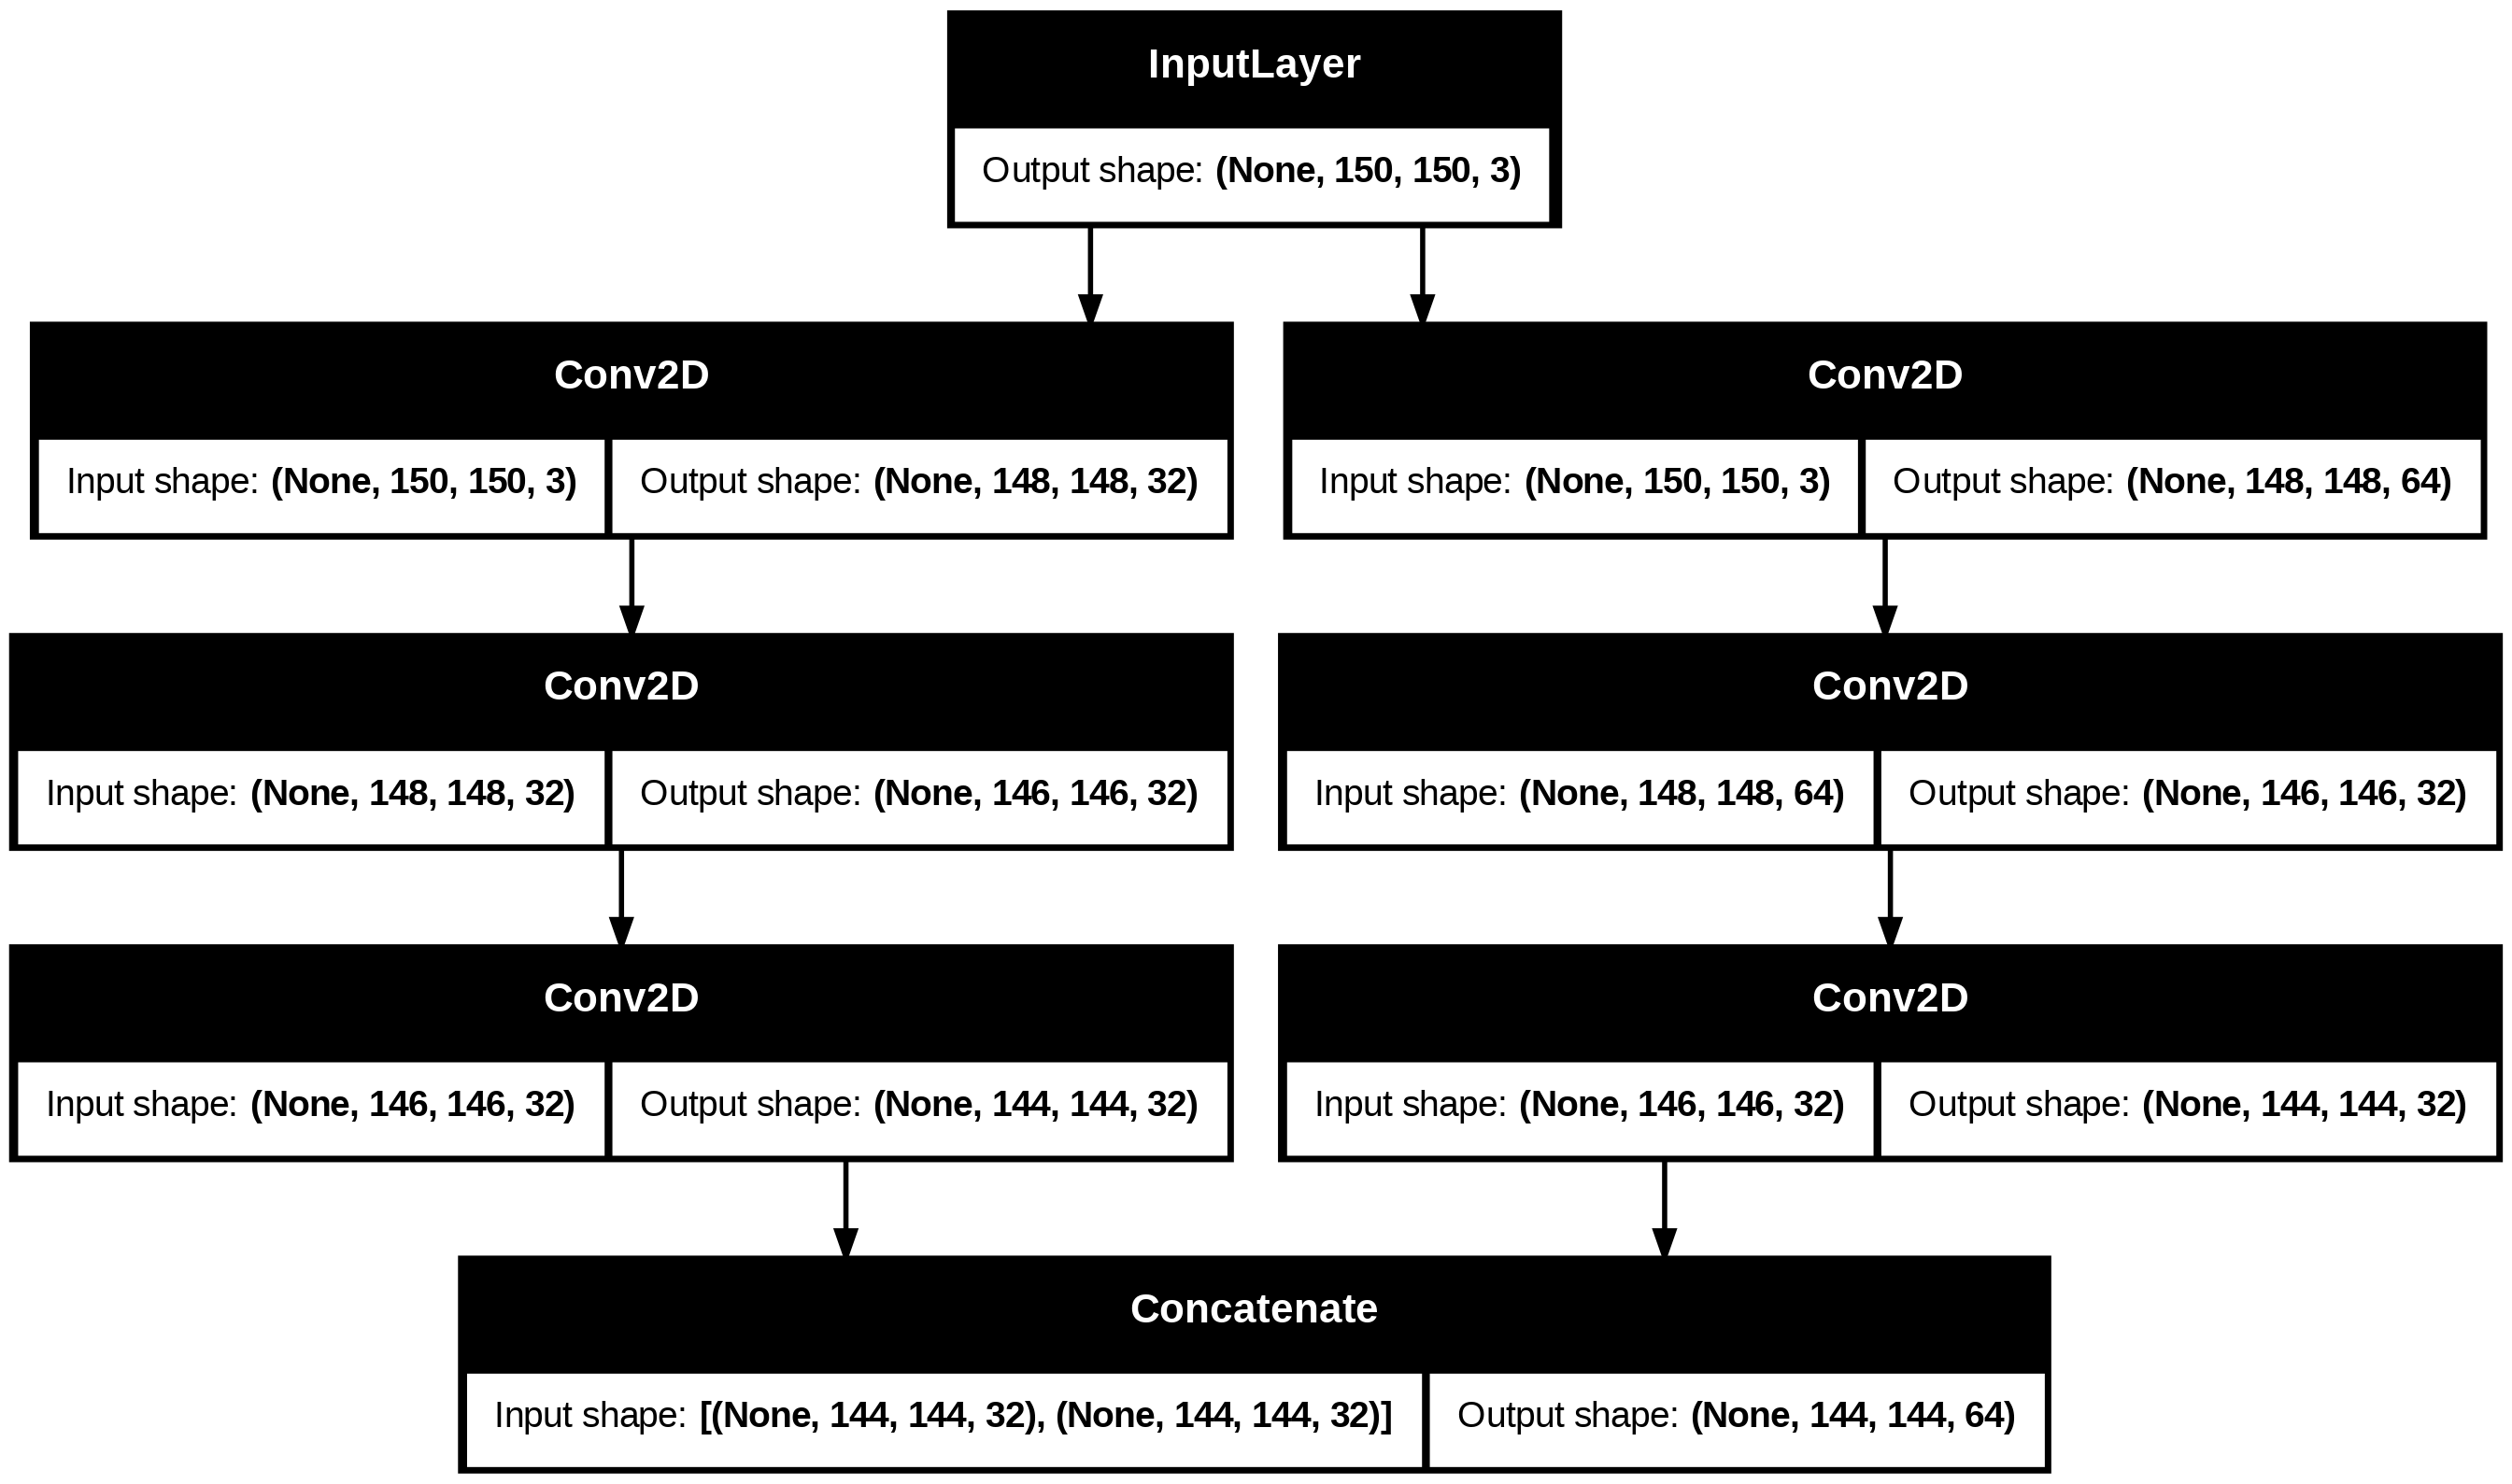

In [ ]:
from keras import models
from keras import layers
from keras.utils import plot_model

inp = layers.Input(shape=(150,150,3))

# Branch 1
x = layers.Conv2D(32, (3,3))(inp)
x = layers.Conv2D(32, (3,3))(x)
out_1 = layers.Conv2D(32, (3,3))(x)

# Branch 2
x1 = layers.Conv2D(64, (3,3))(inp)
x1 = layers.Conv2D(32, (3,3))(x1)
out_2 = layers.Conv2D(32, (3,3))(x1)

merged = layers.concatenate([out_1, out_2])

# func
model = models.Model(inputs=inp, outputs=merged)

model.summary()
plot_model(model, show_shapes=True)


# Example
Demand prediction

Sequential

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_features_detectors (D (None, 3)                 15        
_________________________________________________________________
demand (Dense)               (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
None


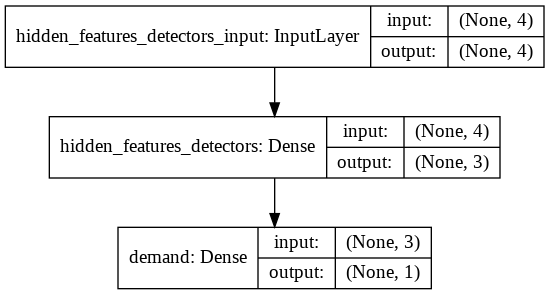

In [ ]:
model = models.Sequential()
model.add(layers.Dense(3, input_shape=(4,), name='hidden_features_detectors'))
model.add(layers.Dense(1, name='demand'))
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Embedding of Material

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
material_embedding (Embeddin (None, None, 3)           12        
_________________________________________________________________
reshape_17 (Reshape)         (None, 3)                 0         
_________________________________________________________________
demand (Dense)               (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


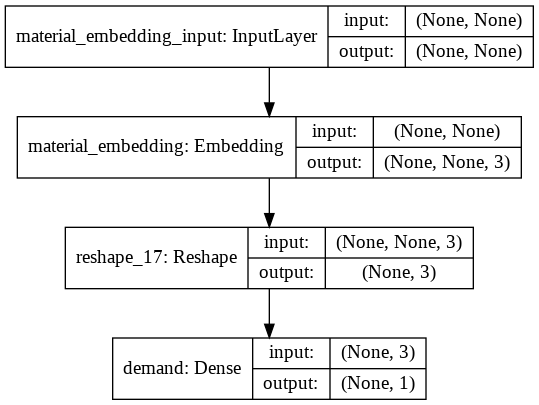

In [ ]:
model = models.Sequential()
# input_dim = number of category levels
# output_dim = embedding dimension/size
model.add(layers.Embedding(input_dim=4, output_dim=3, name='material_embedding'))
model.add(layers.Reshape((3,)))
model.add(layers.Dense(1, name='demand'))
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Now let's fuse all features.

You will notice that we cannot do it with Sequential model. Since we have two inputs now:
- Material
- Rest of features (numerical)

We must use the functional model

(None, 1, 3)
(None, 3)
(None, 3)
(None, 6)
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
reshape_13 (Reshape)            (None, 3)            0           material_embedding[0][0]         
__________________________________________________________________________________________________
numericals (InputLayer)         (None, 3)            0                                            
________________________________________________

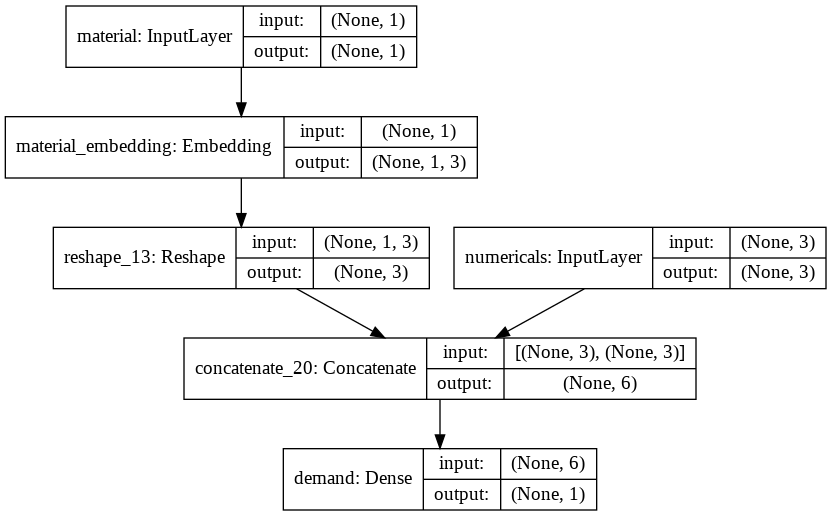

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
print(material_emb.shape)
material_emb = layers.Reshape((3,))(material_emb)
print(material_emb.shape)
numericals = layers.Input(shape=(3,), name='numericals')
print(numericals.shape)
merged = layers.concatenate([material_emb, numericals], axis=-1)
print(merged.shape)
demand = layers.Dense(1, name='demand')(merged)
model = models.Model([material, numericals], demand)
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Material feature first

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
reshape_18 (Reshape)            (None, 3)            0           material_embedding[0][0]         
__________________________________________________________________________________________________
material_feature (Dense)        (None, 1)            4           reshape_18[0][0]                 
___________________________________________________________________________________________

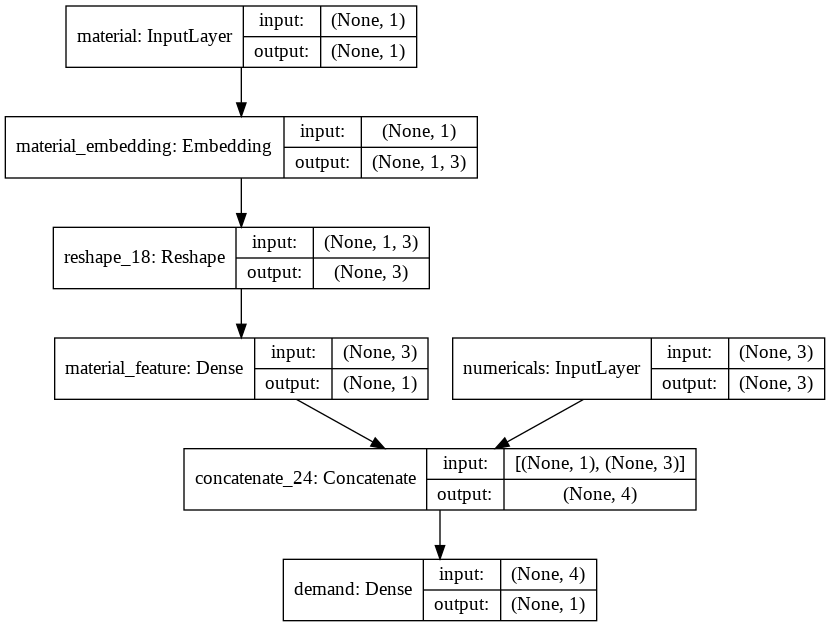

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)
material_feature = layers.Dense(1, name='material_feature')(material_emb)

numericals = layers.Input(shape=(3,), name='numericals')

merged = layers.concatenate([material_feature, numericals], axis=-1)

demand = layers.Dense(1, name='demand')(merged)
model = models.Model([material, numericals], demand)
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Numericals Embedding

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
numericals (InputLayer)         (None, 3)            0                                            
__________________________________________________________________________________________________
reshape_14 (Reshape)            (None, 3)            0           material_embedding[0][0]         
___________________________________________________________________________________________

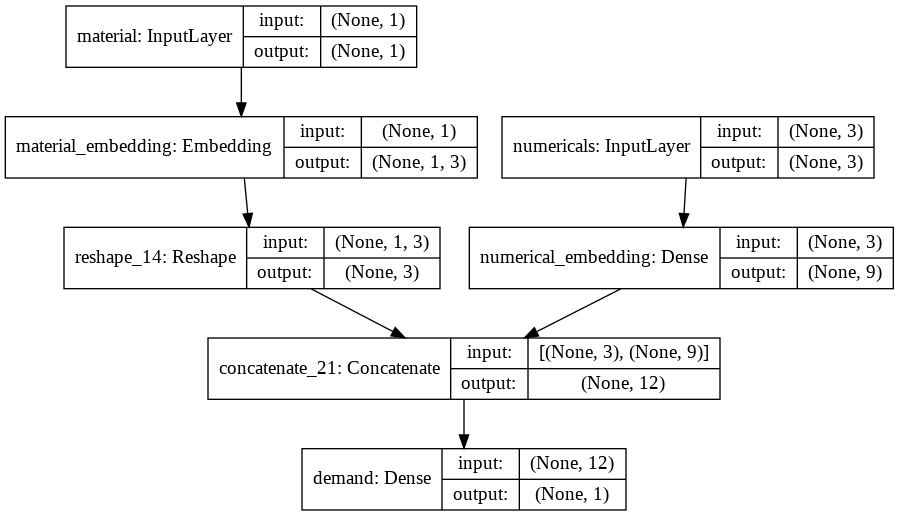

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)

material_emb = layers.Reshape((3,))(material_emb)
numericals = layers.Input(shape=(3,), name='numericals')
numericals_emb = layers.Dense(9, name='numerical_embedding')(numericals)
merged = layers.concatenate([material_emb, numericals_emb], axis=-1)

demand = layers.Dense(1, name='demand')(merged)
model = models.Model([material, numericals], demand)
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Learnable sum

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
numericals (InputLayer)         (None, 3)            0                                            
__________________________________________________________________________________________________
reshape_21 (Reshape)            (None, 3)            0           material_embedding[0][0]         
___________________________________________________________________________________________

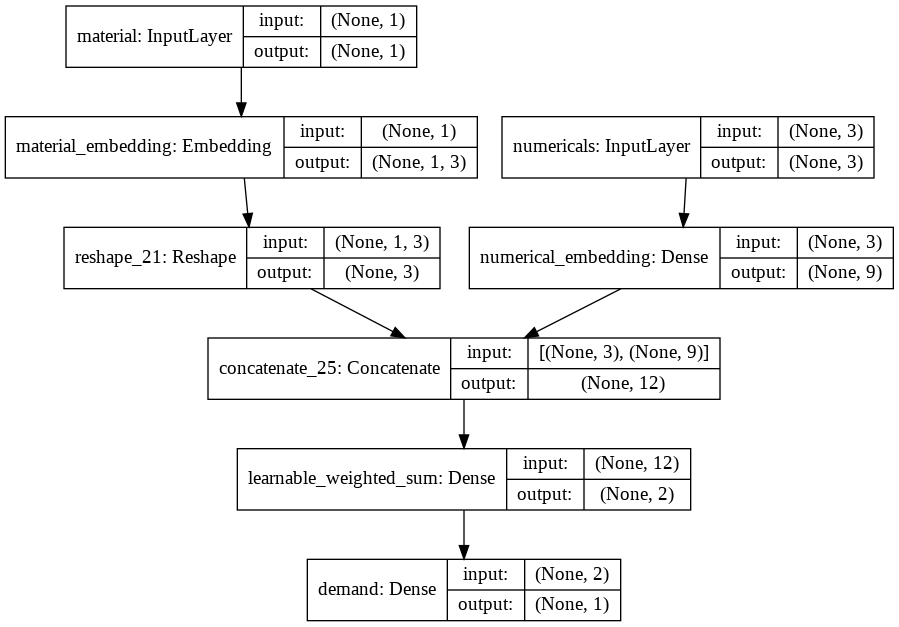

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)

material_emb = layers.Reshape((3,))(material_emb)
numericals = layers.Input(shape=(3,), name='numericals')
numericals_emb = layers.Dense(9, name='numerical_embedding')(numericals)
merged = layers.concatenate([material_emb, numericals_emb], axis=-1)
merged = layers.Dense(2, name='learnable_weighted_sum')(merged)
demand = layers.Dense(1, name='demand')(merged)
model = models.Model([material, numericals], demand)
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Let's have separate embedding per each numerical

The following is exactly equivalent to the the above model, just separating every 1 of the 3 numericals alone.

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
price (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
shipping_cost (InputLayer)      (None, 1)            0                                            
___________________________________________________________________________________________

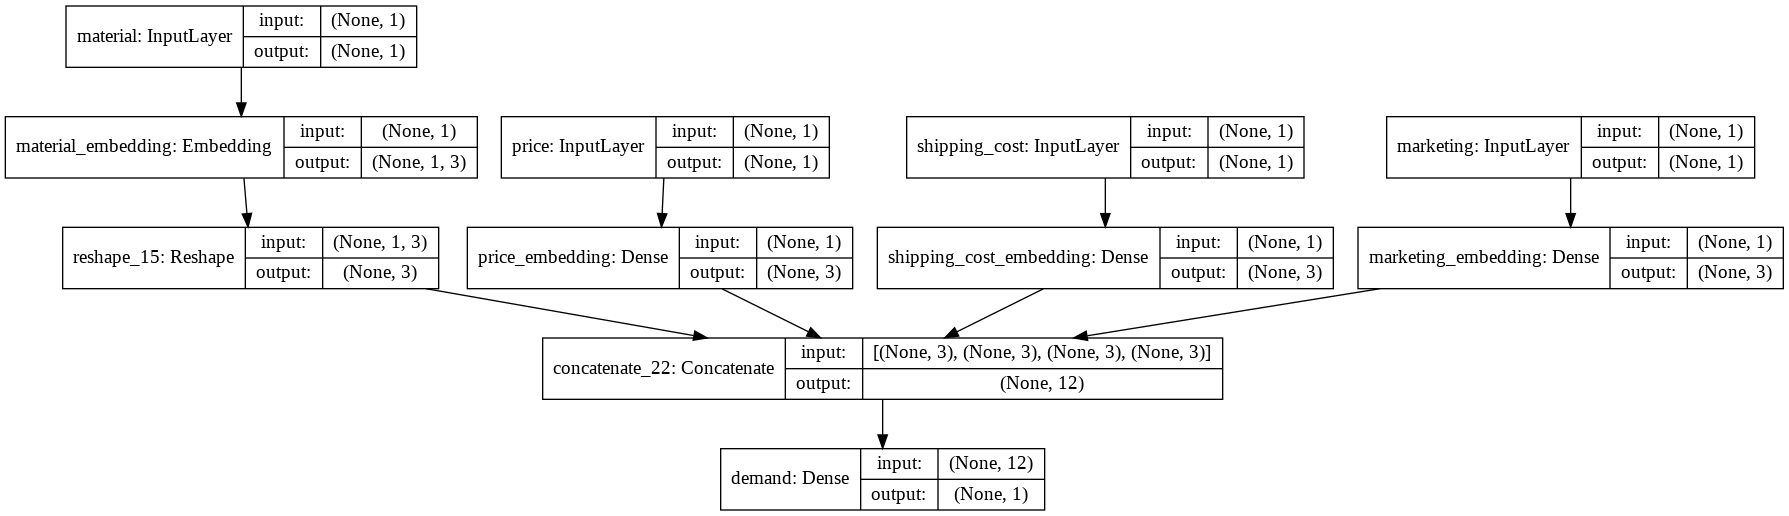

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)

price = layers.Input(shape=(1,), name='price')
price_emb = layers.Dense(3, name='price_embedding')(price)

shipping_cost = layers.Input(shape=(1,), name='shipping_cost')
shipping_cost_emb = layers.Dense(3, name='shipping_cost_embedding')(shipping_cost)

marketing = layers.Input(shape=(1,), name='marketing')
marketing_emb = layers.Dense(3, name='marketing_embedding')(marketing)

merged = layers.concatenate([material_emb, price_emb, shipping_cost_emb, marketing_emb], axis=-1)

demand = layers.Dense(1, name='demand')(merged)
model = models.Model([material, price, shipping_cost, marketing], demand)
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Auxilary task

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
price (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
shipping_cost (InputLayer)      (None, 1)            0                                            
___________________________________________________________________________________________

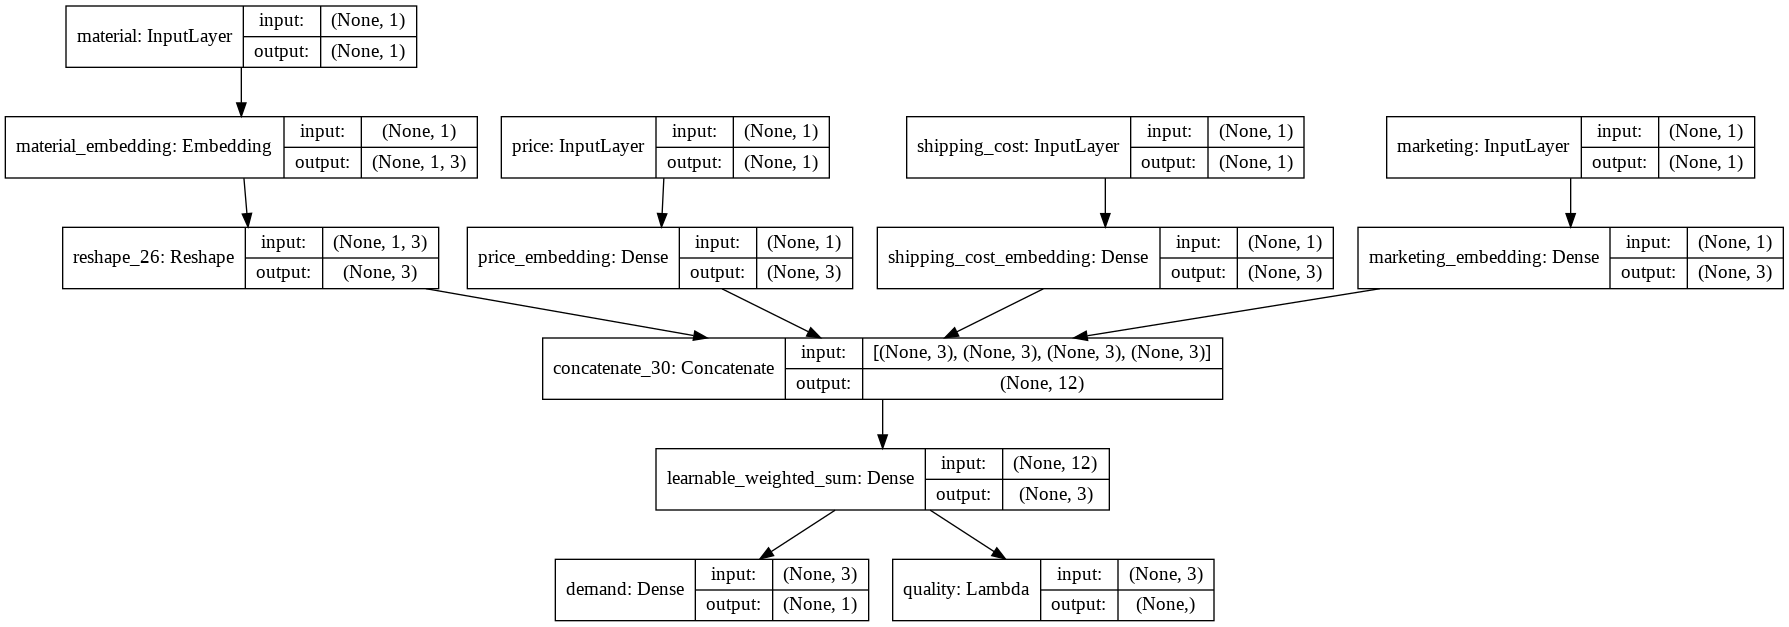

In [ ]:
numericals = layers.Input(shape=(100,), name='material')
embs=[]
for i in range(100):
  numercal_var = layers.Lambda(lambda x:x[:,i])
  embs[i] = layers.Embedding(num_ems, emb_sz)(numercal_var)

material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)

price = layers.Input(shape=(1,), name='price')
price_emb = layers.Dense(3, name='price_embedding')(price)

shipping_cost = layers.Input(shape=(1,), name='shipping_cost')
shipping_cost_emb = layers.Dense(3, name='shipping_cost_embedding')(shipping_cost)

marketing = layers.Input(shape=(1,), name='marketing')
marketing_emb = layers.Dense(3, name='marketing_embedding')(marketing)

merged = layers.concatenate([material_emb, price_emb, shipping_cost_emb, marketing_emb], axis=-1)
merged = layers.Dense(3, name='learnable_weighted_sum')(merged)
demand = layers.Dense(1, name='demand')(merged)
quality = layers.Lambda(lambda x:x[:,-1], name='quality')(merged)
model = models.Model([material, price, shipping_cost, marketing], [demand, quality])
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

MTL

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
__________________________________________________________________________________________________
price (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
shipping_cost (InputLayer)      (None, 1)            0                                            
___________________________________________________________________________________________

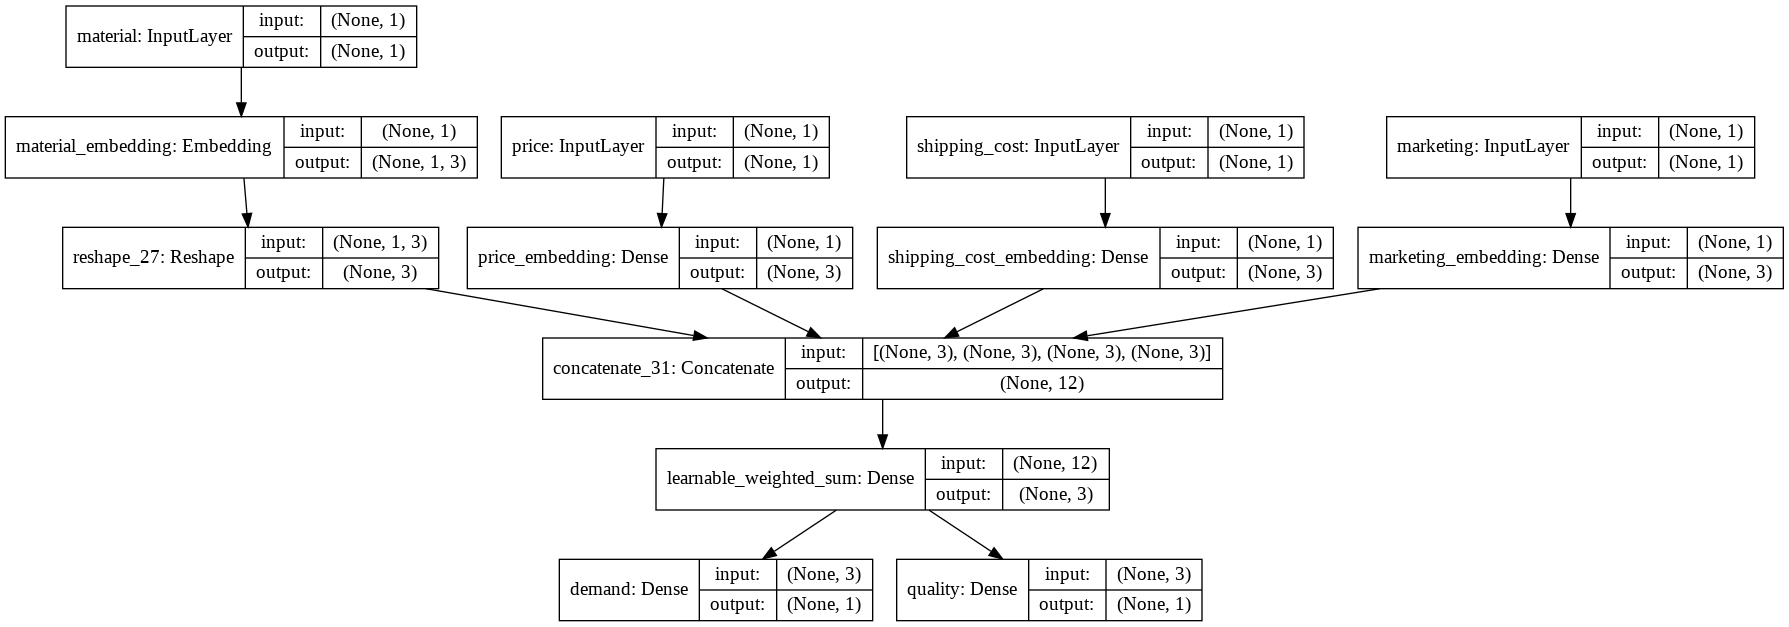

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)

price = layers.Input(shape=(1,), name='price')
price_emb = layers.Dense(3, name='price_embedding')(price)

shipping_cost = layers.Input(shape=(1,), name='shipping_cost')
shipping_cost_emb = layers.Dense(3, name='shipping_cost_embedding')(shipping_cost)

marketing = layers.Input(shape=(1,), name='marketing')
marketing_emb = layers.Dense(3, name='marketing_embedding')(marketing)

merged = layers.concatenate([material_emb, price_emb, shipping_cost_emb, marketing_emb], axis=-1)
merged = layers.Dense(3, name='learnable_weighted_sum')(merged)
demand = layers.Dense(1, name='demand')(merged)
quality = layers.Dense(1, name='quality')(merged)
model = models.Model([material, price, shipping_cost, marketing], [demand, quality])
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

Multi-modalities

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
image (InputLayer)              (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
text (InputLayer)               (None, 10)           0                                            
__________________________________________________________________________________________________
material_embedding (Embedding)  (None, 1, 3)         12          material[0][0]                   
___________________________________________________________________________________________

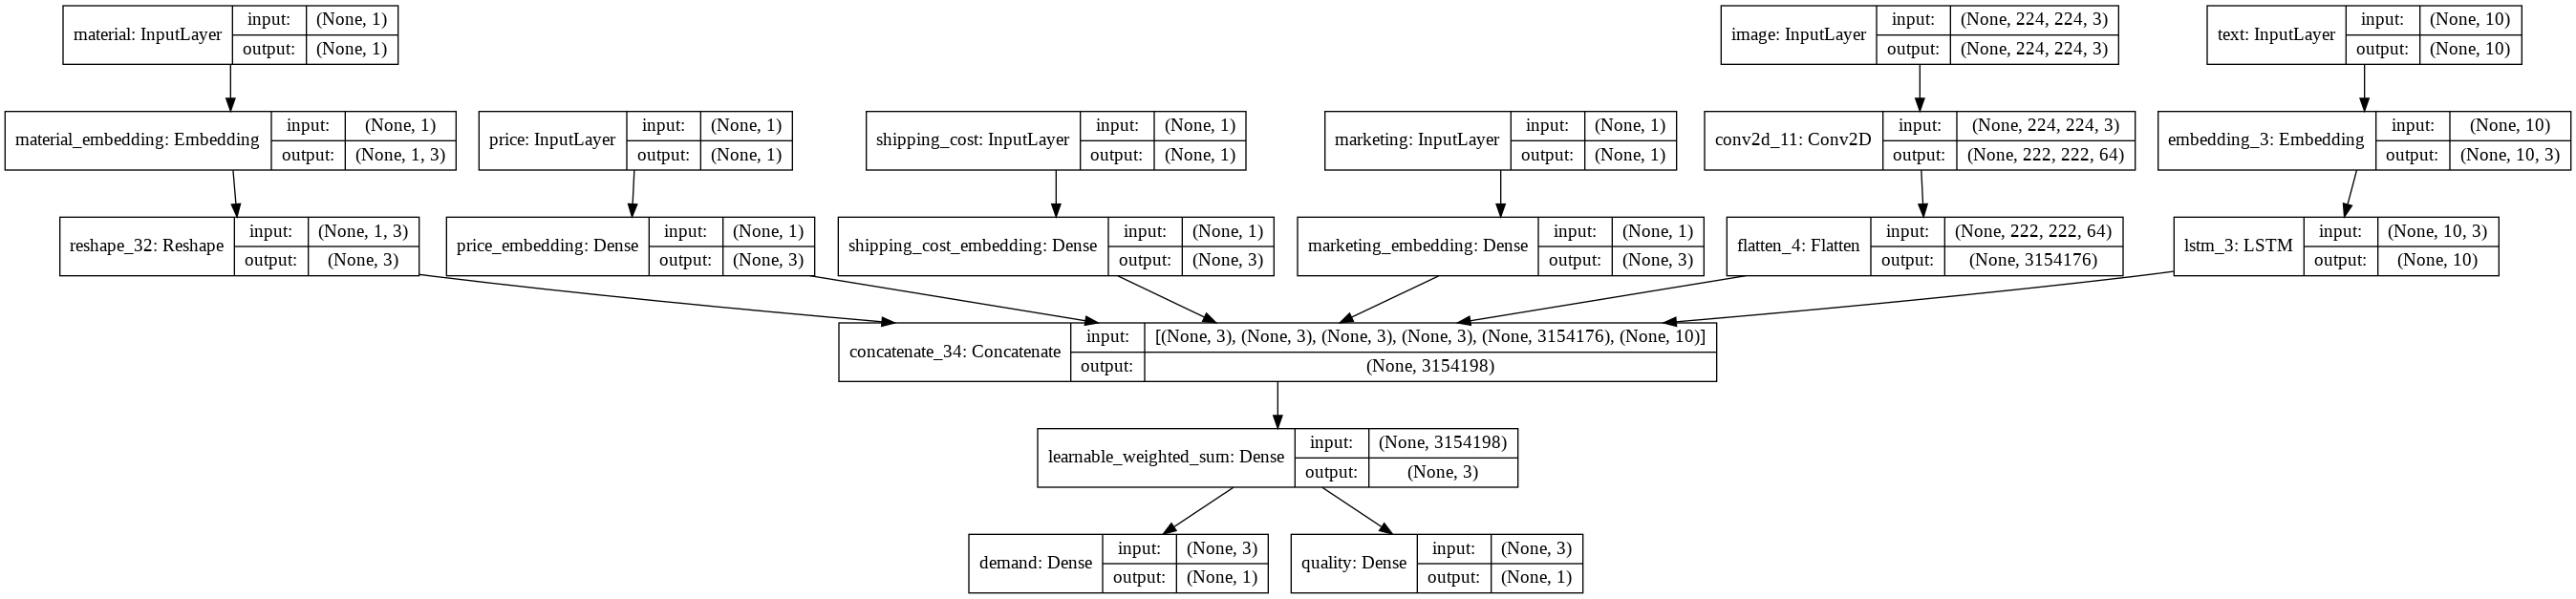

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)

price = layers.Input(shape=(1,), name='price')
price_emb = layers.Dense(3, name='price_embedding')(price)

shipping_cost = layers.Input(shape=(1,), name='shipping_cost')
shipping_cost_emb = layers.Dense(3, name='shipping_cost_embedding')(shipping_cost)

marketing = layers.Input(shape=(1,), name='marketing')
marketing_emb = layers.Dense(3, name='marketing_embedding')(marketing)

image = layers.Input(shape=(224,224,3), name='image')
image_features = layers.Conv2D(64, 3)(image)
image_features = layers.Flatten()(image_features)

text = layers.Input(shape=(10,), name='text')
text_features = layers.Embedding(50, 3)(text)
text_features = layers.LSTM(10)(text_features)


merged = layers.concatenate([material_emb, price_emb, shipping_cost_emb, marketing_emb, image_features, text_features], axis=-1)
merged = layers.Dense(3, name='learnable_weighted_sum')(merged)
demand = layers.Dense(1, name='demand')(merged)
quality = layers.Dense(1, name='quality')(merged)
model = models.Model([image, text, material, price, shipping_cost, marketing], [demand, quality])
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)

+ Video

(None, 10, 3154176)
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
video (InputLayer)              (None, 10, 224, 224, 0                                            
__________________________________________________________________________________________________
material (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
image (InputLayer)              (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
text (InputLayer)               (None, 10)           0                                            
_______________________________________________________________________

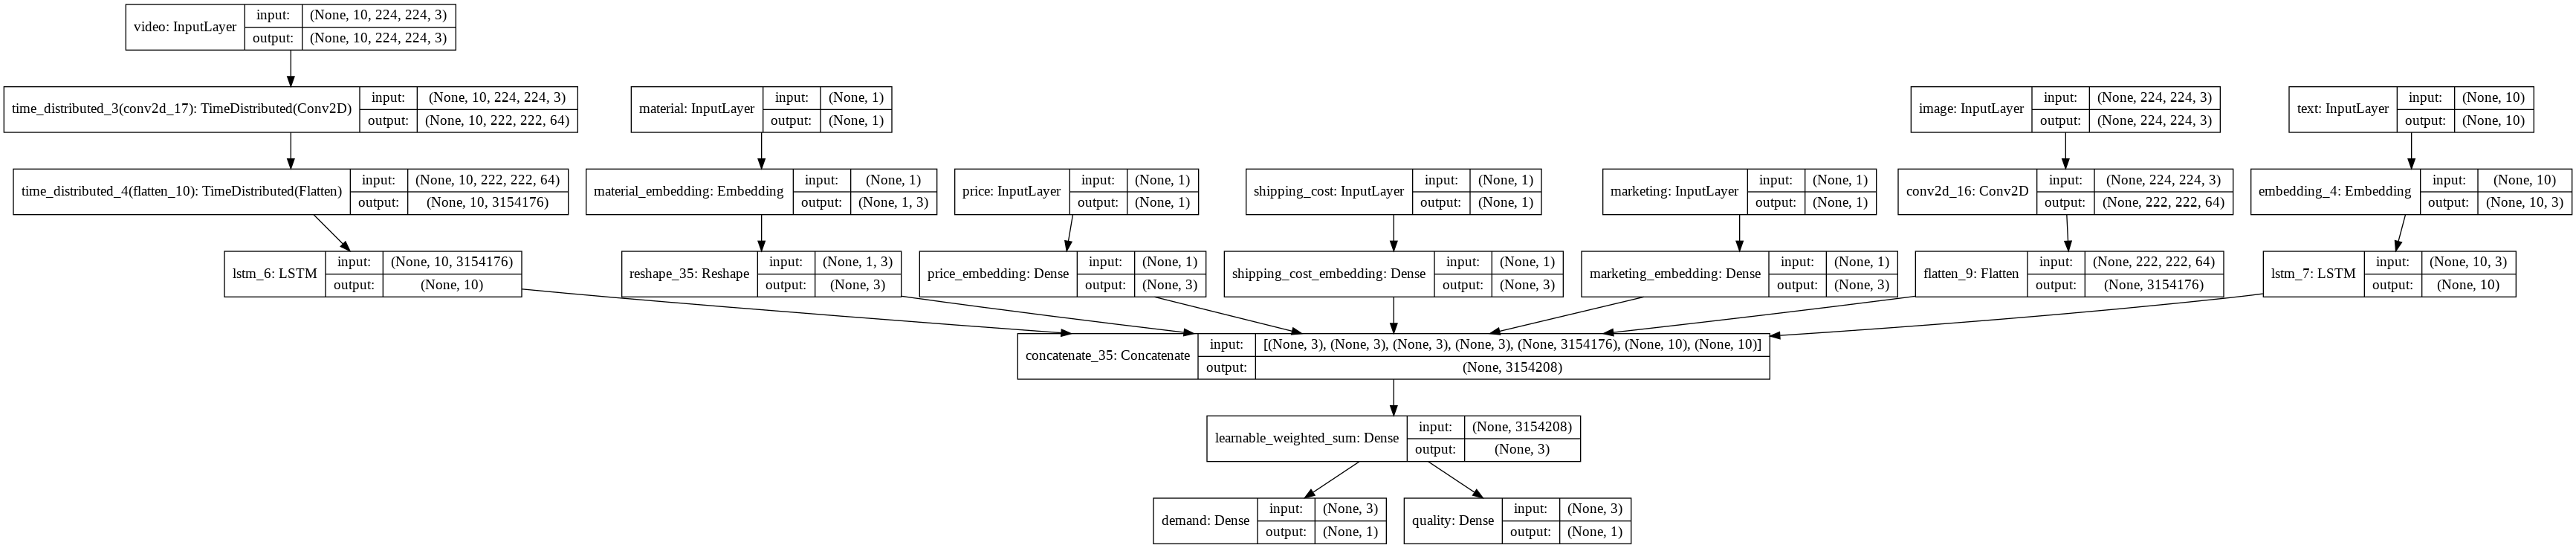

In [ ]:
material = layers.Input(shape=(1,), name='material')
material_emb = layers.Embedding(4, 3, name='material_embedding')(material)
material_emb = layers.Reshape((3,))(material_emb)

price = layers.Input(shape=(1,), name='price')
price_emb = layers.Dense(3, name='price_embedding')(price)

shipping_cost = layers.Input(shape=(1,), name='shipping_cost')
shipping_cost_emb = layers.Dense(3, name='shipping_cost_embedding')(shipping_cost)

marketing = layers.Input(shape=(1,), name='marketing')
marketing_emb = layers.Dense(3, name='marketing_embedding')(marketing)

image = layers.Input(shape=(224,224,3), name='image')
image_features = layers.Conv2D(64, 3)(image)
image_features = layers.Flatten()(image_features)

n_steps = 10
video = layers.Input(shape=(n_steps,224,224,3), name='video')
video_features = layers.TimeDistributed(layers.Conv2D(64, 3))(video)
video_features = layers.TimeDistributed(layers.Flatten())(video_features)
print(video_features.shape)
video_features = layers.LSTM(10)(video_features)

text = layers.Input(shape=(10,), name='text')
text_features = layers.Embedding(50, 3)(text)
text_features = layers.LSTM(10)(text_features)

merged = layers.concatenate([material_emb, price_emb, shipping_cost_emb, marketing_emb, image_features, text_features, video_features], axis=-1)
merged = layers.Dense(3, name='learnable_weighted_sum')(merged)
demand = layers.Dense(1, name='demand')(merged)
quality = layers.Dense(1, name='quality')(merged)
model = models.Model([video, image, text, material, price, shipping_cost, marketing], [demand, quality])
print(model.summary())
plot_model(model, show_layer_names=True, show_shapes=True)